#Importing library again

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2 
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
import glob
import glob as gb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import  metrics
%matplotlib inline


#functions of ploting by matplotlip

In [228]:
class_names = sorted(os.listdir('/content/drive/MyDrive/IMAG/train/'))

In [252]:
def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [264]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(36), predictions_array, color="black")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('blue')
  thisplot[true_label].set_color('red')

#importing my dataset and resize train-test

In [4]:
size=32
d=sorted(os.listdir('/content/drive/MyDrive/IMAG/train'))
l='/content/drive/MyDrive/IMAG/train/'
l+d[0]

'/content/drive/MyDrive/IMAG/train/0'

In [5]:
xt_img=[]
yt_img=[]
for ds in d:
  m=ds.split("\\")[-1]
  print(m)


  for img in glob.glob(os.path.join(l+ds,"*.png")):
    print(img)
    im=cv2.imread(img,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(size,size))
    xt_img.append(im)
    yt_img.append(sorted(m))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/IMAG/train/F/img016-00607.png
/content/drive/MyDrive/IMAG/train/F/img016-00606.png
/content/drive/MyDrive/IMAG/train/F/img016-00618.png
/content/drive/MyDrive/IMAG/train/F/img016-00617.png
/content/drive/MyDrive/IMAG/train/F/img016-00609.png
/content/drive/MyDrive/IMAG/train/F/img016-00638.png
/content/drive/MyDrive/IMAG/train/F/img016-00608.png
/content/drive/MyDrive/IMAG/train/F/img016-00640.png
/content/drive/MyDrive/IMAG/train/F/img016-00587.png
/content/drive/MyDrive/IMAG/train/F/img016-00532.png
/content/drive/MyDrive/IMAG/train/F/img016-00584.png
/content/drive/MyDrive/IMAG/train/F/img016-00555.png
/content/drive/MyDrive/IMAG/train/F/img016-00585.png
/content/drive/MyDrive/IMAG/train/F/img016-00522.png
/content/drive/MyDrive/IMAG/train/F/img016-00575.png
/content/drive/MyDrive/IMAG/train/F/img016-00586.png
/content/drive/MyDrive/IMAG/train/F/img016-00524.png
/content/drive/MyDrive/IMAG/train/F/img016-00556

In [6]:
xt_img=np.array(xt_img)
yt_img=np.array(yt_img)

In [7]:
size=32
b='/content/drive/MyDrive/IMAG/val/'
from IPython.lib.display import join
xte_img=[]
yte_img=[]
for ds in d:
  k=ds.split("\\")[-1]
  print(k)


  for img in glob.glob(os.path.join(b+ds,"*.png")):
    print(img)
    imn=cv2.imread(img,cv2.IMREAD_COLOR)
    imn=cv2.resize(imn,(size,size))
    xte_img.append(imn)
    yte_img.append(k)

0
/content/drive/MyDrive/IMAG/val/0/img001-00417.png
/content/drive/MyDrive/IMAG/val/0/img001-00411.png
/content/drive/MyDrive/IMAG/val/0/img001-00421.png
/content/drive/MyDrive/IMAG/val/0/img001-00412.png
/content/drive/MyDrive/IMAG/val/0/img001-00423.png
/content/drive/MyDrive/IMAG/val/0/img001-00802.png
/content/drive/MyDrive/IMAG/val/0/img001-00796.png
/content/drive/MyDrive/IMAG/val/0/img001-00798.png
/content/drive/MyDrive/IMAG/val/0/img001-00773.png
/content/drive/MyDrive/IMAG/val/0/img001-00736.png
/content/drive/MyDrive/IMAG/val/0/img001-00741.png
/content/drive/MyDrive/IMAG/val/0/img001-00817.png
/content/drive/MyDrive/IMAG/val/0/img001-00735.png
/content/drive/MyDrive/IMAG/val/0/img001-00794.png
/content/drive/MyDrive/IMAG/val/0/img001-00760.png
/content/drive/MyDrive/IMAG/val/0/img001-00797.png
/content/drive/MyDrive/IMAG/val/0/img001-00815.png
/content/drive/MyDrive/IMAG/val/0/img001-00805.png
/content/drive/MyDrive/IMAG/val/0/img001-00789.png
/content/drive/MyDrive/IMAG/v

In [8]:
xte_img=np.array(xte_img)
yte_img=np.array(yte_img)

#Encoding labels 0-36

In [9]:
le=preprocessing.LabelEncoder()
le.fit(yt_img)
y=le.transform(yt_img)
le.fit(yte_img)
ye=le.transform(yte_img)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Normalizing and reshabe-expand

In [10]:
x_train,y_train,x_test,y_test=xt_img,y,xte_img,ye

In [11]:
x_train,x_test=x_train/255.0,x_test/255.0

In [12]:
x_train.shape

(7705, 32, 32, 3)

In [13]:
y_train.shape

(7705,)

In [14]:
image_features=x_train

In [15]:
image_features=np.expand_dims(x_train,axis=0)
image_features.shape

(1, 7705, 32, 32, 3)

In [16]:
print(image_features.shape)
X=np.reshape(image_features,(x_train.shape[0],-1))
print(X.shape)

(1, 7705, 32, 32, 3)
(7705, 3072)


In [17]:
test_features=x_test
test_features=np.expand_dims(test_features,axis=0)
print(test_features.shape)
Xp=np.reshape(test_features,(x_test.shape[0],-1))
print(Xp.shape)

(1, 3340, 32, 32, 3)
(3340, 3072)


#ANN model

In [201]:
m = keras.models.Sequential()
m.add(keras.layers.Flatten(input_shape=(3072,)))
m.add(keras.layers.Dense(256, activation='relu'))
m.add(keras.layers.Dense(256, activation='relu'))
m.add(keras.layers.Dense(128, activation='relu'))
m.add(keras.layers.Dense(128, activation='relu'))
m.add(keras.layers.Dense(36, activation='softmax'))



In [202]:
m.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 3072)              0         
                                                                 
 dense_179 (Dense)           (None, 256)               786688    
                                                                 
 dense_180 (Dense)           (None, 256)               65792     
                                                                 
 dense_181 (Dense)           (None, 128)               32896     
                                                                 
 dense_182 (Dense)           (None, 128)               16512     
                                                                 
 dense_183 (Dense)           (None, 36)                4644      
                                                                 
Total params: 906,532
Trainable params: 906,532
Non-t

In [203]:
m.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [204]:
m.fit(X, y_train, epochs=95)

Epoch 1/95
241/241 [==============================] - 3s 10ms/step - loss: 2.8494 - accuracy: 0.2301
Epoch 2/95
241/241 [==============================] - 2s 10ms/step - loss: 1.6719 - accuracy: 0.5467
Epoch 3/95
241/241 [==============================] - 3s 11ms/step - loss: 1.2981 - accuracy: 0.6459
Epoch 4/95
241/241 [==============================] - 3s 10ms/step - loss: 1.1597 - accuracy: 0.6809
Epoch 5/95
241/241 [==============================] - 2s 10ms/step - loss: 1.0334 - accuracy: 0.7116
Epoch 6/95
241/241 [==============================] - 2s 10ms/step - loss: 0.9285 - accuracy: 0.7358
Epoch 7/95
241/241 [==============================] - 2s 10ms/step - loss: 0.8855 - accuracy: 0.7455
Epoch 8/95
241/241 [==============================] - 2s 10ms/step - loss: 0.8079 - accuracy: 0.7679
Epoch 9/95
241/241 [==============================] - 2s 10ms/step - loss: 0.7405 - accuracy: 0.7842
Epoch 10/95
241/241 [==============================] - 2s 10ms/step - loss: 0.7065 - accura

In [286]:
loss,acc=m.evaluate(Xp, y_test)

105/105 [==============================] - 0s 5ms/step - loss: 1.4017 - accuracy: 0.8251


#ACCURACY IS

In [287]:
print('{:.0f}%'.format(100*acc))

83%


#predicitions my ANN model

In [288]:

predictions = m.predict(Xp)
print(predictions)

105/105 [==============================] - 1s 5ms/step
[[9.98415709e-01 1.03294096e-17 2.46345457e-12 ... 1.12225368e-11
  5.49451672e-14 6.27448550e-16]
 [3.98404449e-02 6.96685530e-19 1.67834102e-25 ... 2.32451504e-19
  7.81072686e-19 1.46591641e-15]
 [9.55225170e-01 3.37404457e-16 6.22028318e-10 ... 5.13191377e-13
  2.37896264e-13 3.31329711e-14]
 ...
 [1.22253605e-11 3.73818340e-14 3.04928305e-10 ... 2.05635752e-06
  5.88934324e-09 9.99635339e-01]
 [1.48392871e-06 5.66012848e-10 2.97506398e-04 ... 3.48080852e-04
  2.18867646e-10 4.35736822e-03]
 [4.88061400e-04 1.72428383e-08 1.19108414e-07 ... 4.06181999e-03
  2.43480943e-04 1.33043120e-03]]


#Examples of model predictions

['C']


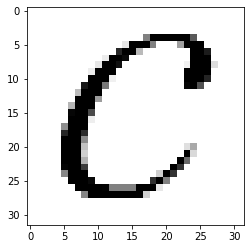

In [282]:
 i = np.random.randint(0,x_test.shape[0]-1)
import numpy as np
mo=np.argmax(predictions[i])
 mo=le.inverse_transform([mo])
print(mo)
plt.imshow(x_test[i],cmap=plt.cm.binary)
plt.show()


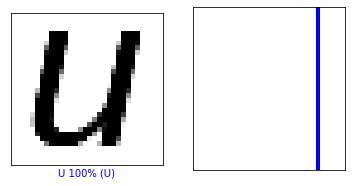

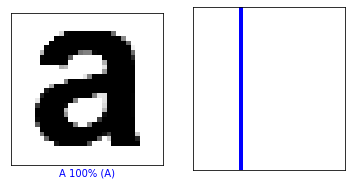

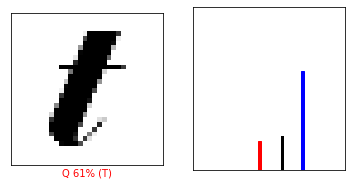

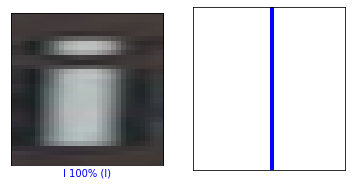

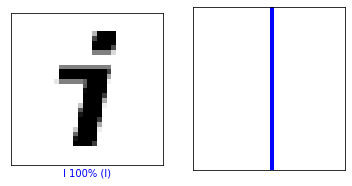

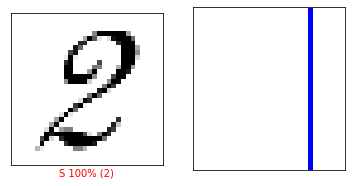

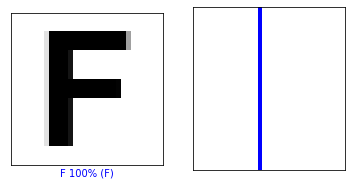

In [290]:
for i in range(7):
  i = np.random.randint(0,x_test.shape[0]-1)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, y_test, xte_img)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  y)
  plt.show()

